<a href="https://colab.research.google.com/github/DanielaMoVel/Ciencia_Datos_Fisicos/blob/main/Tareas/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2
# Daniela Patricia Morales Velarde

El dataset que trabajamos fue obtenido de: https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows 

En donde los datos son acerca de series y películas de Netflix, donde tendremos el tipo, el título, director, cast, países, el año, la clasificación, género y una pequeña descripción. Usaremos algunas de las columnas para plantear algunas preguntas.

*   Separaremos las películas y las series
*   La duración de las series y películas
*   La cantidad de contenido que se publica a través de los años
*   Dos filtros usando algunos de los resultados anteriores





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Leemos el archivo csv
data = pd.read_csv('/content/drive/MyDrive/Dataset/netflix_titles.csv')

In [4]:
#Para darnos una idea de nuestra base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
#Mostrar las primeras 3 filas
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


##¿Cuántas series y películas se tienen en la base de datos de Netflix?

In [6]:
#Vemos que valores puede tener type
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

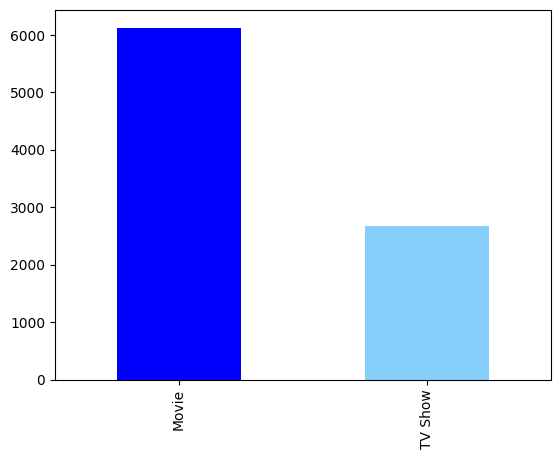

In [7]:
data['type'].value_counts().plot(kind="bar",color=['blue', 'lightskyblue'])
plt.show()

Podemos ver que se tiene una mayor cantidad de películas que de series registradas en esta base de datos sobre películas y series de Netflix

## La duración de las series y películas

Las series están divididas en temporadas y las películas en minutos, entonces separaremos estas dos opciones para saber la duración de las películas y series

In [22]:
#Filtramos las películas
pelis = data['type']=='Movie'
Movie = data[pelis]
count_duracion_movie = Movie['duration'].value_counts()

count_duracion_movie = count_duracion_movie.head(15)

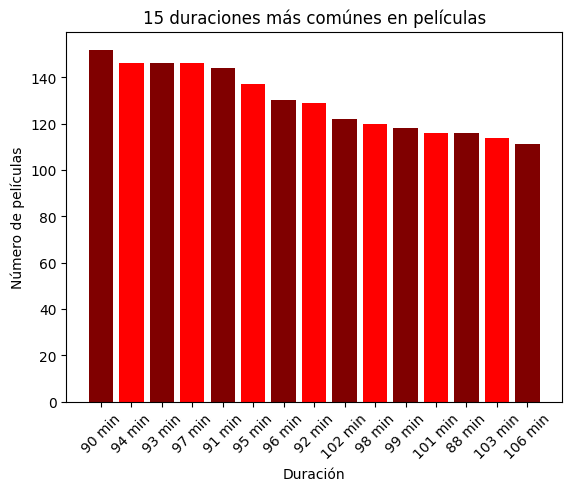

In [23]:

plt.bar(count_duracion_movie.index, count_duracion_movie.values, color = ['maroon', 'red'])
plt.xlabel('Duración')
plt.xticks(rotation=45)
plt.ylabel('Número de películas')
plt.title('15 duraciones más comúnes en películas')

plt.show()


Al tener una mayor cantidad de datos en la duración de las películas, mostramos las 15 duraciones que más se repiten. Podemos notar que la mayoría se encuentran en los 90's minutos, y esto debe ser por presupuesto, por el tiempo que la audiencia puede estar concentrado en una película entre otras situaciones.

In [24]:
#Filtramos series
serie = data['type']=='TV Show'
TV_Show = data[serie]

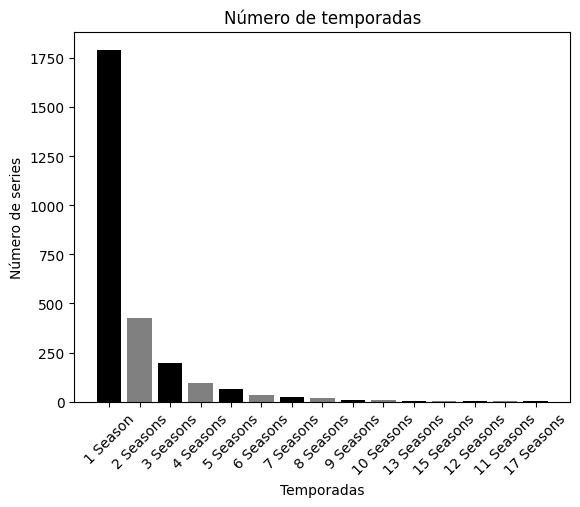

In [25]:
count_duracion_series = TV_Show['duration'].value_counts()
plt.bar(count_duracion_series.index, count_duracion_series.values, color = ['black', 'grey'])
plt.xlabel('Temporadas')
plt.xticks(rotation=45)
plt.ylabel('Número de series')
plt.title('Número de temporadas')

plt.show()


La mayoría de las series que podemos encontrar en esta base de datos tienen una temporada, esto puede ser porque sean miniseries, o que por alguna razón netflix decidió cancelarlas tras su primera temporada, además que vemos que la mayoría de las series no duran tantas temporadas, y tenemos muy pocas series con más de 5 temporadas.

## Contenido a través de los años

El próposito de esta pregunta es ver el crecimiento o decrecimiento de la cantidad de contenido que podemos encontrar en Netflix a través de los años. El año que fueron lanzadas no es el mismo que el año en el que fueron agregadas a la plataforma.

In [35]:
#Filtramos en una tabla si se trata de una serie o película y el año
anio = (data.groupby(['type','release_year'])['title'].size()).reset_index()
anio

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


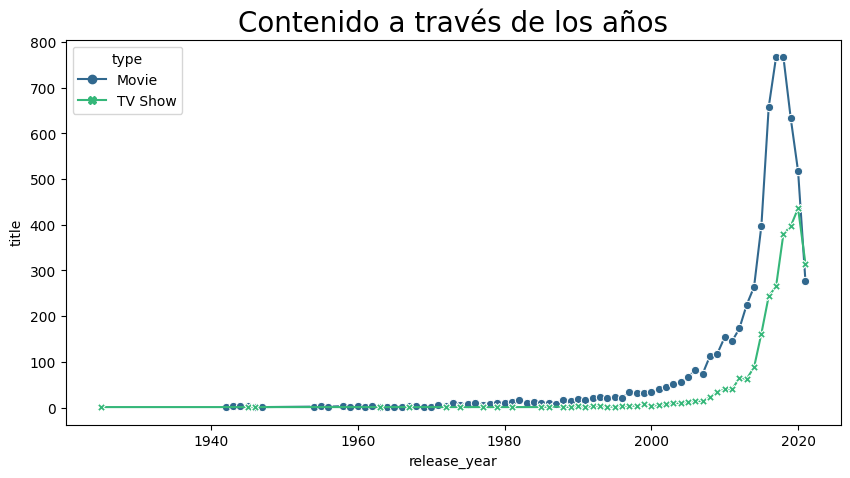

In [97]:
#Graficamos 
fig = plt.figure(figsize=(10,5))
sns.lineplot(data = anio ,x = 'release_year',y = 'title',hue = 'type',style = 'type',palette='viridis',markers=True, dashes=False)
plt.title("Contenido a través de los años",fontsize=20)

plt.show()

En esta última gráfica podemos ver que el contenido que hay en Netflix, son películas y series que se estrenaron en los últimos 20 años, y vemos que no es muy compun encontrar películas viejas.

## Búsqueda de películas y series

Vamos a hacer algunas tablas combinando los datos obtenidos en las gráficas que ya mostramos

### ¿Cuáles son las películas de 90 minutos más recientes?

In [76]:
#Recordemos que esta es la tabla con películas
Movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [93]:
#Filtramos las películas de 90 mínutos
min90 = Movie['duration']=='90 min'
recientes_90min = Movie[min90].sort_values(by='release_year', ascending=False)
recientes_90min.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1218,s1219,Movie,YES DAY,Miguel Arteta,"Jennifer Garner, Edgar Ramírez, Jenna Ortega, ...",United States,"March 12, 2021",2021,PG,90 min,"Children & Family Movies, Comedies",A mom and dad who usually say no decide to say...
623,s624,Movie,Mommy Issues,Jose Javier Reyes,"Pokwang, Sue Ramirez, Jerome Ponce, Ryan Bang,...",NaN,"June 30, 2021",2021,TV-MA,90 min,"Comedies, Dramas, International Movies",Close quarters and new romances add trouble to...


Vemos que el año, más reciente es el 2021, entonces filtramos las que son de este año

In [96]:
recientes_90min[recientes_90min['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1218,s1219,Movie,YES DAY,Miguel Arteta,"Jennifer Garner, Edgar Ramírez, Jenna Ortega, ...",United States,"March 12, 2021",2021,PG,90 min,"Children & Family Movies, Comedies",A mom and dad who usually say no decide to say...
623,s624,Movie,Mommy Issues,Jose Javier Reyes,"Pokwang, Sue Ramirez, Jerome Ponce, Ryan Bang,...",NaN,"June 30, 2021",2021,TV-MA,90 min,"Comedies, Dramas, International Movies",Close quarters and new romances add trouble to...
1372,s1373,Movie,June & Kopi,Noviandra Santosa,"Acha Septriasa, Ryan Delon, Makayla Rose Hilli...",Indonesia,"January 28, 2021",2021,TV-PG,90 min,"Children & Family Movies, Dramas, Internationa...","A street dog is taken in by a young couple, an..."
1171,s1172,Movie,Seaspiracy,Ali Tabrizi,NaN,United States,"March 24, 2021",2021,TV-14,90 min,Documentaries,"Passionate about ocean life, a filmmaker sets ..."
283,s284,Movie,Misha and the Wolves,Sam Hobkinson,NaN,"Belgium, United Kingdom","August 11, 2021",2021,PG-13,90 min,"Documentaries, International Movies","As a little girl, she escaped the Holocaust an..."
1420,s1421,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,NaN,United States,"January 11, 2021",2021,TV-MA,90 min,Documentaries,"A cheap, powerful drug emerges during a recess..."
882,s883,Movie,Jungle Beat: The Movie,Brent Dawes,"Ed Kear, David Menkin, Ina Marie Smith, John G...",Mauritius,"May 14, 2021",2021,TV-Y7,90 min,"Children & Family Movies, Comedies",When a lost and lonely alien crash-lands on Ea...
458,s459,Movie,My Amanda,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...",NaN,"July 15, 2021",2021,TV-14,90 min,"Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...


Por lo tanto tenemos 8 películas de 90 minutos del año 2021

### ¿Cuáles son las series con 6 temporadas que salieron en los años 2019, 2020, 2021?

Es importante conocer las series que tienen una mayor cantidad de temporadas, para saber si tienen algo en común por si queremos hacer una serie con mayor duración.

In [159]:
#Tabla de series
TV_Show.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [129]:
#Filtramos las sextas temporadas
temp6 = TV_Show[TV_Show['duration'] == '6 Seasons']

In [157]:
#filtramos los años
filtros_series_anios = (temp6['release_year'] == 2021) | (temp6['release_year'] == 2020) | (temp6['release_year'] == 2019)

In [158]:
temp6[filtros_series_anios]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
677,s678,TV Show,Schitt's Creek,NaN,"Eugene Levy, Catherine O'Hara, Daniel Levy, An...","Canada, United States","June 19, 2021",2020,TV-MA,6 Seasons,TV Comedies,"Suddenly broke, the formerly filthy-rich Rose ..."
1173,s1174,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"March 23, 2021",2021,TV-14,6 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...
2293,s2294,TV Show,Cable Girls,NaN,"Blanca Suárez, Nadia de Santiago, Ana Fernánde...",Spain,"July 3, 2020",2019,TV-MA,6 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In 1920s Madrid, four women at the National Te..."
2390,s2391,TV Show,How to Get Away with Murder,NaN,"Viola Davis, Billy Brown, Alfred Enoch, Jack F...",United States,"June 13, 2020",2020,TV-14,6 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Brilliant criminal defense attorney and law pr...
2515,s2516,TV Show,Patriot Act with Hasan Minhaj,NaN,Hasan Minhaj,United States,"May 17, 2020",2020,TV-MA,6 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies","Every Sunday, Hasan Minhaj brings an incisive ..."
2523,s2524,TV Show,Madam Secretary,NaN,"Téa Leoni, Tim Daly, Bebe Neuwirth, Zeljko Iva...",United States,"May 15, 2020",2019,TV-PG,6 Seasons,TV Dramas,When a highly capable woman becomes secretary ...
3369,s3370,TV Show,BoJack Horseman,NaN,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,"October 25, 2019",2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...


Tenemos pocas series con 6 temporadas, y para saber si tienen más cosas en común podríamos analizar los generos que tienen, en donde fueron desarrolladas.